In [ ]:
!pip install pyspark


In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("MySparkApp").getOrCreate()


In [ ]:
# Import PySpark and initialize SparkSession
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg

In [ ]:
# Initialize Spark session
spark = SparkSession.builder.appName("NYC_Airbnb_Analysis").getOrCreate()

In [ ]:
# Load the NYC Airbnb dataset from a CSV file
# You can upload the dataset to Google Colab's file system or provide a URL to the dataset
# Replace 'nyc_airbnb_data.csv' with your actual dataset file name or URL
nyc_airbnb_data = spark.read.csv('AB_NYC_2019.csv', header=True, inferSchema=True)

In [ ]:
# Show the first few rows of the dataset to get an overview
nyc_airbnb_data.show()

+----+--------------------+-------+----------------+-------------------+------------------+--------+---------+---------------+-----+--------------+-----------------+-----------+-----------------+------------------------------+----------------+
|  id|                name|host_id|       host_name|neighbourhood_group|     neighbourhood|latitude|longitude|      room_type|price|minimum_nights|number_of_reviews|last_review|reviews_per_month|calculated_host_listings_count|availability_365|
+----+--------------------+-------+----------------+-------------------+------------------+--------+---------+---------------+-----+--------------+-----------------+-----------+-----------------+------------------------------+----------------+
|2539|Clean & quiet apt...|   2787|            John|           Brooklyn|        Kensington|40.64749|-73.97237|   Private room|  149|             1|                9| 19-10-2018|             0.21|                             6|             365|
|2595|Skylit Midtown Ca.

In [ ]:
dataset_size = nyc_airbnb_data.count()
print("Dataset size:", dataset_size)


Dataset size: 49079


In [ ]:
# Number of rows
num_rows = nyc_airbnb_data.count()

# Number of columns
num_cols = len(nyc_airbnb_data.columns)

# Column names
column_names = nyc_airbnb_data.columns

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)
print("Column names:", column_names)


Number of rows: 49079
Number of columns: 16
Column names: ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [ ]:
# Data Preprocessing:
# Rename columns and drop unnecessary columns
nyc_airbnb_data = nyc_airbnb_data.withColumnRenamed("neighbourhood_group", "borough")
columns_to_drop = ["id", "host_id", "host_name", "last_review"]
nyc_airbnb_data = nyc_airbnb_data.drop(*columns_to_drop)

In [ ]:
# Show the preprocessed dataset
nyc_airbnb_data.show()

+--------------------+---------+------------------+--------+---------+---------------+-----+--------------+-----------------+-----------------+------------------------------+----------------+
|                name|  borough|     neighbourhood|latitude|longitude|      room_type|price|minimum_nights|number_of_reviews|reviews_per_month|calculated_host_listings_count|availability_365|
+--------------------+---------+------------------+--------+---------+---------------+-----+--------------+-----------------+-----------------+------------------------------+----------------+
|Clean & quiet apt...| Brooklyn|        Kensington|40.64749|-73.97237|   Private room|  149|             1|                9|             0.21|                             6|             365|
|Skylit Midtown Ca...|Manhattan|           Midtown|40.75362|-73.98377|Entire home/apt|  225|             1|               45|             0.38|                             2|             355|
|THE VILLAGE OF HA...|Manhattan|        

query --> savi


In [ ]:
# Data Analysis:
avg_price_by_borough = nyc_airbnb_data.groupBy("borough").agg(avg("price").alias("average_price"))
avg_price_by_borough = avg_price_by_borough.orderBy("average_price", ascending=False)

# Show the Results:
avg_price_by_borough.show()


+-------------------+------------------+
|            borough|     average_price|
+-------------------+------------------+
|          Manhattan|196.74321570806705|
|           Brooklyn|124.39840438793318|
|      Staten Island|114.99459459459459|
|             Queens| 99.57690941385435|
|              Bronx|  87.7287037037037|
|  Greenwich Village|              55.5|
|    Jackson Heights|              16.0|
|       Clinton Hill|              14.0|
|   Brooklyn Heights|              14.0|
|    Upper West Side|              13.0|
|            Midwood|12.666666666666666|
|            Astoria|              12.0|
|           Flushing|10.333333333333334|
|            Midtown|               9.0|
|      Randall Manor|               7.0|
|       Williamsburg| 6.333333333333333|
|           Longwood|               5.0|
|Morningside Heights|               5.0|
|      East Flatbush|               4.0|
|      Crown Heights|3.6666666666666665|
+-------------------+------------------+
only showing top

In [ ]:
#The output of this code will show you the top 10 Airbnb listings in New York City with the highest number of reviews.
most_reviewed_listings = nyc_airbnb_data.orderBy("number_of_reviews", ascending=False).limit(10)
most_reviewed_listings.show()


+--------------------+---------+------------------+--------+---------+---------------+-----+--------------+-----------------+-----------------+------------------------------+----------------+
|                name|  borough|     neighbourhood|latitude|longitude|      room_type|price|minimum_nights|number_of_reviews|reviews_per_month|calculated_host_listings_count|availability_365|
+--------------------+---------+------------------+--------+---------+---------------+-----+--------------+-----------------+-----------------+------------------------------+----------------+
|      Sunny/Cozy 1BD| Brooklyn|     Crown Heights| 40.6737|-73.95335|Entire home/apt|   81|            30|               99|             1.67|                             3|             318|
|Cozy 2 Bedrooms B...| Brooklyn|Bedford-Stuyvesant|40.68528|-73.91573|Entire home/apt|  175|             4|               99|             2.12|                             1|             334|
|Big Room by Metro...| Brooklyn|Bedford-

query-->tanvi


In [ ]:
# Calculate the popularity of neighborhoods
popular_neighborhoods = nyc_airbnb_data.groupBy("neighbourhood").count().orderBy("count", ascending=False)

# Show the popular neighborhoods
popular_neighborhoods.show()

+------------------+-----+
|     neighbourhood|count|
+------------------+-----+
|      Williamsburg| 3914|
|Bedford-Stuyvesant| 3705|
|            Harlem| 2642|
|          Bushwick| 2460|
|   Upper West Side| 1968|
|    Hell's Kitchen| 1951|
|      East Village| 1849|
|   Upper East Side| 1791|
|     Crown Heights| 1560|
|           Midtown| 1541|
|        Greenpoint| 1114|
|       East Harlem| 1112|
|           Chelsea| 1111|
|   Lower East Side|  911|
|           Astoria|  898|
|Washington Heights|  895|
|      West Village|  766|
|Financial District|  744|
|          Flatbush|  619|
|      Clinton Hill|  571|
+------------------+-----+
only showing top 20 rows



In [ ]:
from pyspark.sql.window import Window
from pyspark.sql.functions import rank, desc

# Filter for private rooms and entire apartments
private_rooms = nyc_airbnb_data.filter(nyc_airbnb_data.room_type == "Private room")
entire_apts = nyc_airbnb_data.filter(nyc_airbnb_data.room_type == "Entire home/apt")

# Find the private room with the most reviews
window_spec_private = Window.orderBy(desc("number_of_reviews"))
top_private_room = private_rooms.withColumn("rank", rank().over(window_spec_private)).filter("rank == 1").select("name", "neighbourhood", "number_of_reviews")

# Find the entire apartment with the most reviews
window_spec_entire = Window.orderBy(desc("number_of_reviews"))
top_entire_apt = entire_apts.withColumn("rank", rank().over(window_spec_entire)).filter("rank == 1").select("name", "neighbourhood", "number_of_reviews")

# Show the results
print("Most Reviewed Private Room:")
top_private_room.show()

print("Most Reviewed Entire Apartment:")
top_entire_apt.show()

Most Reviewed Private Room:
+--------------------+--------------------+-----------------+
|                name|       neighbourhood|number_of_reviews|
+--------------------+--------------------+-----------------+
|High-end doorman ...|     Lower East Side|               99|
|THE BEST DEAL ON ...|              Harlem|               99|
|Heart of Williams...|        Williamsburg|               99|
|Big Room by Metro...|  Bedford-Stuyvesant|               99|
|Sunny Room near C...|         East Harlem|               99|
|Sunny & Happy Roo...|        Williamsburg|               99|
|- C - Cozy Secure...|        Williamsburg|               99|
|              #NAME?|        Williamsburg|               99|
|        BIG NEW ROOM|             Astoria|               99|
|Private bedroom a...|        East Village|               99|
|Comfy private roo...|        Williamsburg|               99|
|Wonderful island ...|    Roosevelt Island|               99|
|Nice bedroom. Sle...|         East Harlem

In [ ]:
# Filter the NYC Airbnb dataset to find hotels that are no longer available and have 0 days of availability
closed_hotels = nyc_airbnb_data.filter(nyc_airbnb_data.availability_365 == 0)

# Count the number of hotels that are not available anymore
closed_hotel_count = closed_hotels.count()

# Select and display the names of hotels that are not available anymore
closed_hotel_names = closed_hotels.select("name")

# Show the count and names of closed hotels
print(f"The number of hotels that are not available anymore is {closed_hotel_count}.")
closed_hotel_names.show(truncate=False)


The number of hotels that are not available anymore is 17511.
+--------------------------------------------------+
|name                                              |
+--------------------------------------------------+
|Entire Apt: Spacious Studio/Loft by central park  |
|BlissArtsSpace!                                   |
|Cozy Clean Guest Room - Family Apt                |
|West Village Nest - Superhost                     |
|Sweet and Spacious Brooklyn Loft                  |
|Magnifique Suite au N de Manhattan - vue Cloitres |
|bright and stylish duplex                         |
|Light-filled 2B duplex in the heart of Park Slope!|
|Great Location for NYC                            |
|Charming 1 bed GR8 WBurg LOCATION!                |
|East Village Sanctuary                            |
|NYC artists’ loft with roof deck                  |
|Sunny, Cobble Hill Apartment                      |
|* Spacious GARDEN Park Slope Duplex* 6 people max |
|Convenient cozy cheap apt Manhattan 

query --> prasskha

In [ ]:
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("PriceVsReviews").getOrCreate()

# Select relevant columns (price and number of reviews) and handle null values
price_reviews_data = nyc_airbnb_data.select("price", "number_of_reviews").dropna()

# List the query in ascending order based on "price"
price_reviews_data = price_reviews_data.orderBy("price", ascending=True)

# Show the results
price_reviews_data.show()


+---------+-----------------+
|    price|number_of_reviews|
+---------+-----------------+
|-73.99986|              100|
|-74.00828|              125|
|        0|               55|
|        0|                1|
|        0|               16|
|        0|               12|
|        0|                3|
|        0|               93|
|        0|               95|
|        0|               95|
|        0|                0|
|        0|                2|
|        0|                5|
|        1|       09-04-2019|
|        1|       05-07-2019|
|        1|       17-02-2019|
|        1|       05-07-2019|
|        1|       01-07-2019|
|        1|       04-07-2019|
|        1|       08-07-2019|
+---------+-----------------+
only showing top 20 rows



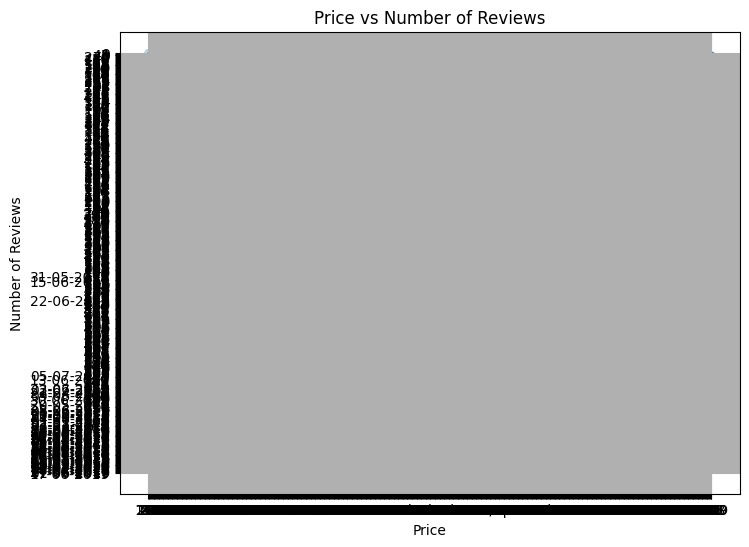

In [ ]:
# import matplotlib.pyplot as plt

# # Extract price and number of reviews data
# data = nyc_airbnb_data.select("price", "number_of_reviews").dropna().collect()

# # Unzip data into separate lists for plotting
# prices, reviews = zip(*data)

# # Plotting the relationship between price and number of reviews
# plt.figure(figsize=(8, 6))
# plt.scatter(prices, reviews, alpha=0.5, color='blue')
# plt.title('Price vs Number of Reviews')
# plt.xlabel('Price')
# plt.ylabel('Number of Reviews')
# plt.grid(True)
# plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Extract price and number of reviews data
data = nyc_airbnb_data.select("price", "number_of_reviews").dropna().toPandas()

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="price", y="number_of_reviews", alpha=0.5)
plt.title('Price vs Number of Reviews')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()



query -> tanya


In [ ]:
# Clean up resources by stopping the Spark session
spark.stop()


SyntaxError: ignored

In [ ]:
# Filter the NYC Airbnb dataset to find hotels available for 365 days
hotels_365_days = nyc_airbnb_data.filter(nyc_airbnb_data.availability_365 == 365)

# Count the number of hotels available for 365 days
hotels_365_days_count = hotels_365_days.count()

# Select and display the names of hotels available for 365 days
hotel_names_365_days = hotels_365_days.select("name")

# Show the count and names of hotels available for 365 days
print(f"The number of hotels available for 365 days is {hotels_365_days_count}.")
hotel_names_365_days.show(truncate=False)


The number of hotels available for 365 days is 1285.
+-------------------------------------------------+
|name                                             |
+-------------------------------------------------+
|Clean & quiet apt home by the park               |
|THE VILLAGE OF HARLEM....NEW YORK !              |
|Clean and Quiet in Brooklyn                      |
|Country space in the city                        |
|Upper Manhattan, New York                        |
|Huge Private  Floor at The Waverly               |
|Charming & Cozy midtown loft any WEEK ENDS  !!!  |
|Beautiful Queens Brownstone! - 5BR               |
|( F) Excellent/Pvt Rm                            |
|Clean and convenient 2BR apartment               |
|3 floors of luxury!                              |
|Beautiful Uptown Manhattan apartmnt              |
|Nice, clean, safe, convenient 3BR                |
|SpaHa Studio Monthly Rental                      |
|Private Room/bath Luxurious Harlem               |
|Large and 

In [ ]:
pip install matplotlib pandas


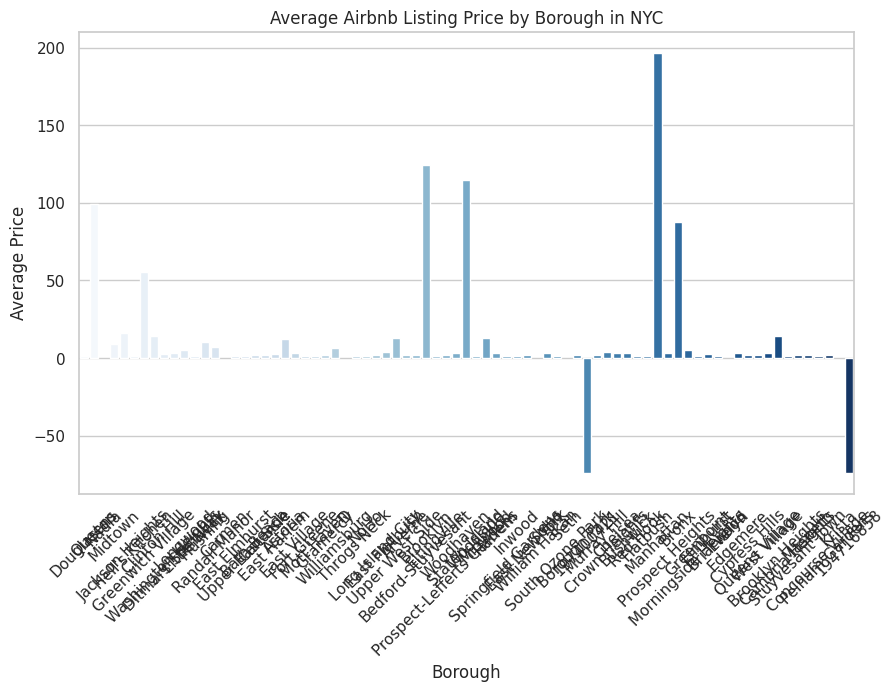

+------------------+------------------+
|           borough|     average_price|
+------------------+------------------+
|        Douglaston|               1.0|
|            Queens| 99.57690941385435|
|             Nadia|              NULL|
|           Midtown|               9.0|
|   Jackson Heights|              16.0|
|    Hell's Kitchen|1.2857142857142858|
| Greenwich Village|              55.5|
|      Clinton Hill|              14.0|
|Washington Heights|              2.75|
|  Ditmars Steinway|3.3333333333333335|
|          Longwood|               5.0|
|       Little Neck|               1.0|
|          Flushing|10.333333333333334|
|     Randall Manor|               7.0|
|            Carmen|              NULL|
|     East Elmhurst|               1.0|
|   Upper East Side|1.5714285714285714|
|              NULL|              NULL|
|        Bath Beach|               2.0|
|          Canarsie|              1.75|
+------------------+------------------+
only showing top 20 rows



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average price by borough
avg_price_by_borough = nyc_airbnb_data.groupBy("borough").agg(avg("price").alias("average_price"))

# Create a bar chart for visualization
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x="borough", y="average_price", data=avg_price_by_borough.toPandas(), palette="Blues")

# Add labels and title
plt.xlabel("Borough")
plt.ylabel("Average Price")
plt.title("Average Airbnb Listing Price by Borough in NYC")

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

# Show the results
avg_price_by_borough.show()

+-------------+---------------------+
|room_category|avg_reviews_per_month|
+-------------+---------------------+
|       Entire|   1.3036304004734627|
|       Shared|   1.6278664007976078|
|      Private|   1.4415262529154118|
+-------------+---------------------+



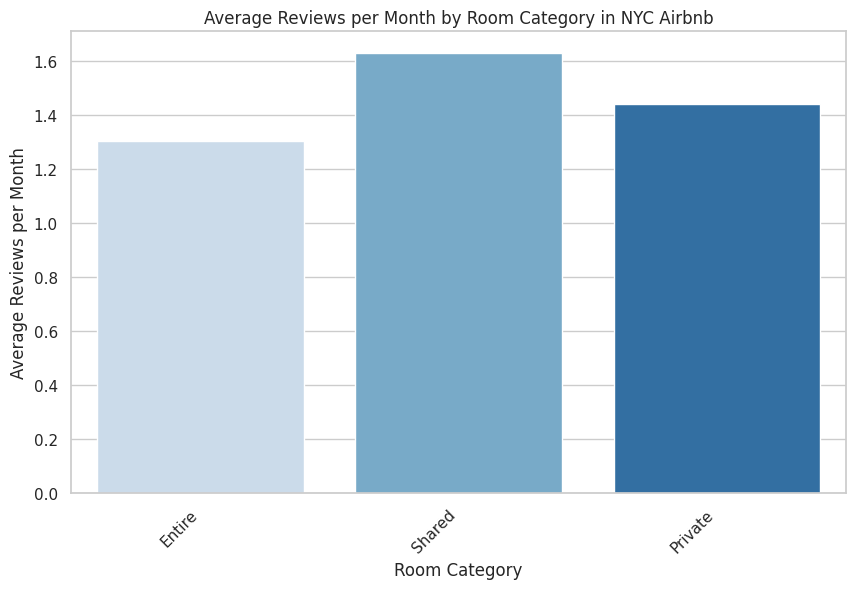

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import avg, when

# Create a new column to categorize room types into "Private," "Entire," and "Shared"
categorized_data = nyc_airbnb_data.withColumn("room_category", when(nyc_airbnb_data.room_type == "Private room", "Private")
                                             .when(nyc_airbnb_data.room_type == "Entire home/apt", "Entire")
                                             .otherwise("Shared"))

# Calculate the average reviews per month for each room category
avg_reviews_per_month_by_category = categorized_data.groupBy("room_category").agg(avg("reviews_per_month").alias("avg_reviews_per_month"))

# Show the results
avg_reviews_per_month_by_category.show()

# Create a bar chart for visualization
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
chart = sns.barplot(x="room_category", y="avg_reviews_per_month", data=avg_reviews_per_month_by_category.toPandas(), palette="Blues")

# Rotate the x-axis labels for better visibility
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

# Add labels and title
plt.xlabel("Room Category")
plt.ylabel("Average Reviews per Month")
plt.title("Average Reviews per Month by Room Category in NYC Airbnb")

# Show the plot
plt.show()


In [ ]:
# Find the top 10 most expensive listings
top_expensive_listings = nyc_airbnb_data.orderBy("price", ascending=False).limit(10)

# Select specific columns to display
columns_to_display = ["name", "price", "neighbourhood", "room_type"]

# Filter for available listings (adjust as needed)
filtered_listings = top_expensive_listings.filter(top_expensive_listings.availability_365 > 0)

# Show the top 10 most expensive available listings with selected columns
filtered_listings.select(columns_to_display).show(truncate=False)


+--------------------------------------------------+---------------+---------------+---------------+
|name                                              |price          |neighbourhood  |room_type      |
+--------------------------------------------------+---------------+---------------+---------------+
| 2.5  baths. Newly renovated                      |Private room   |Brooklyn       |-73.94639      |
|"""Central Park"" View Prvt Room                  |Private room   |Manhattan      |-73.95777      |
|"""Bushwick in Manhattan"" Interactive            |Private room   |Manhattan      |-73.94861      |
|"""Chill"" Private 1BR Close to A                 |Manhattan      |2              |Howard         |
|"Cozy ""Jr."" 1B                                  |Entire home/apt|Brooklyn       |-73.95179      |
|M/A                                               |Entire home/apt|Brooklyn       |-73.90783      |
|"Charming ""Library"" Apt                         |Entire home/apt|Manhattan      |-74.002

In [ ]:
# Calculate the number of listings offering "Entire home/apt" room types by neighborhood group
entire_home_listings_by_group = nyc_airbnb_data.filter(nyc_airbnb_data.room_type == "Entire home/apt").groupBy("neighbourhood").count()

# Show the results
entire_home_listings_by_group.show()


#The query you provided is calculating the number of listings that offer "Entire home/apt" room types in the NYC Airbnb dataset and grouping them by the "neighbo

+------------------+-----+
|     neighbourhood|count|
+------------------+-----+
|            Corona|   13|
|      Richmondtown|    1|
|      Prince's Bay|    3|
|       Westerleigh|    1|
|        Mill Basin|    4|
|      Civic Center|   35|
|        Douglaston|    3|
|        Mount Hope|   10|
|       Marble Hill|    5|
|         Rego Park|   40|
|     Dyker Heights|    7|
| Kew Gardens Hills|   17|
|      Dongan Hills|    4|
|Financial District|  572|
|       Bay Terrace|    3|
|           Midtown| 1096|
|           Bayside|   13|
|   Jackson Heights|   58|
|    Hell's Kitchen| 1187|
|        Highbridge|    7|
+------------------+-----+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import when

# Calculate the average price difference for each room type compared to the overall average price
avg_price_by_type = nyc_airbnb_data.groupBy("room_type").agg(avg("price").alias("avg_price"))
overall_avg_price = nyc_airbnb_data.agg(avg("price").alias("overall_avg_price"))

price_difference_by_type = avg_price_by_type.join(overall_avg_price)

price_difference_by_type = price_difference_by_type.withColumn("price_difference",
    when(col("room_type") == "Entire home/apt", col("avg_price") - col("overall_avg_price"))
    .when(col("room_type") == "Private room", col("avg_price") - col("overall_avg_price"))
    .when(col("room_type") == "Shared room", col("avg_price") - col("overall_avg_price"))
    .otherwise(0))

# Show the results
price_difference_by_type.select("room_type", "price_difference").show()


+-----------+------------------+
|  room_type|  price_difference|
+-----------+------------------+
|         54|               0.0|
|        200|               0.0|
|        138|               0.0|
|         69|               0.0|
|         42|               0.0|
|Shared room|-82.08997508324386|
|  -73.95777|               0.0|
|        425|               0.0|
|         59|               0.0|
|        250|               0.0|
|        160|               0.0|
|         35|               0.0|
|  -73.95179|               0.0|
|        410|               0.0|
|        298|               0.0|
|        188|               0.0|
|         99|               0.0|
|        110|               0.0|
|       NULL|               0.0|
|        179|               0.0|
+-----------+------------------+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import col

# Get the data types of all columns
column_data_types = nyc_airbnb_data.dtypes

# Filter columns with numeric data types
numeric_columns = [col_name for col_name, col_type in column_data_types if col_type in ["int", "double"]]

# Check if there are any columns with numeric data
if numeric_columns:
    print("Columns with numeric data:", numeric_columns)
else:
    print("No columns with numeric data found.")


Columns with numeric data: ['availability_365']
